# Linear regression 

## 1. Load packages 

In [7]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels import regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

## 2. Prepare data 

In [8]:
#load data 
df = pd.read_csv("C:/Users/julie/dataframe_PS_2.csv", index_col='Unnamed: 0')

#define X and y 
X = df[[
    'temp_DE', 
    'weekday', 
    'hour', 
    'season', 
    'year',
    'Q_DE_lag1', 
    'Q_BE_lag1', 
    'Q_FR_lag1', 
    'Q_NL_lag1',
    'Q_AT_lag1',
       ]]

y = df['Q_DE']


#split the dataframe betweenn train and test 
X_train = X.iloc[:round(len(df)*0.75)]
y_train = y.iloc[:round(len(df)*0.75)]
X_test = X.iloc[round(len(df)*0.75)+1:]
y_test = y.iloc[round(len(df)*0.75)+1:]

In [9]:
df.head()

,P_DE,Q_DE,P_FR,Q_FR,P_BE,Q_BE,P_ES,Q_ES,P_AT,Q_AT,...,temp_DE_lag24,hour_lag24,day_lag24,month_lag24,year_lag24,weekday_lag24,season_lag24,temp_lag24,HDD_lag24,CDD_lag24
2015-01-06 00:00:00+00:00,30.57,50701.75,40.28,67795.0,40.28,10656.75,50.45,23940.0,29.4950,5220.25,...,1.326210,0.0,5.0,1.0,2015.0,1.0,1.0,-16.673790,0.0,1.0
2015-01-06 01:00:00+00:00,30.25,49484.25,39.20,66811.0,39.20,10280.50,46.00,22118.0,27.6000,5014.75,...,1.289899,1.0,5.0,1.0,2015.0,1.0,1.0,-16.710101,0.0,1.0
2015-01-06 02:00:00+00:00,30.29,49368.00,36.22,64040.0,36.22,10054.00,43.84,21015.0,27.2975,4867.75,...,1.208266,2.0,5.0,1.0,2015.0,1.0,1.0,-16.791734,0.0,1.0
2015-01-06 03:00:00+00:00,30.63,50157.75,34.04,63275.0,34.04,10078.00,40.13,20518.0,28.0450,4973.50,...,1.063030,3.0,5.0,1.0,2015.0,1.0,1.0,-16.936970,0.0,1.0
2015-01-06 04:00:00+00:00,29.64,51816.00,38.58,65977.0,38.58,10414.75,40.00,20478.0,28.8925,4926.00,...,0.901010,4.0,5.0,1.0,2015.0,1.0,1.0,-17.098990,0.0,1.0


## 3. Estimation

In [10]:
#I use statmodels package to get linear regression table and sklearn to make predictions 
#robust standard errors: cov_type='HC1' 

def linreg(X,Y):
    X = sm.add_constant(X)
    model = regression.linear_model.OLS(Y, X).fit(cov_type='HC1')
    a = model.params[0]
    b = model.params[1]
    X = X[:, 1]

    return model.summary()

print(linreg(X_train.values, y_train.values))


regr = linear_model.LinearRegression()
regr.fit(X_train, y_train) # Train the model using the training sets
y_pred = regr.predict(X_test) # Make predictions using the testing set

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                 8.881e+04
Date:                Wed, 25 Nov 2020   Prob (F-statistic):               0.00
Time:                        10:57:28   Log-Likelihood:            -2.0419e+05
No. Observations:               22318   AIC:                         4.084e+05
Df Residuals:                   22307   BIC:                         4.085e+05
Df Model:                          10                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.753e+05   5.53e+04      4.976      0.0

## 4. Evaluation

Root mean squared error is equal to : 2224.5713619512053
Mean Absolute percentage error is equal to: 2.694201228771965


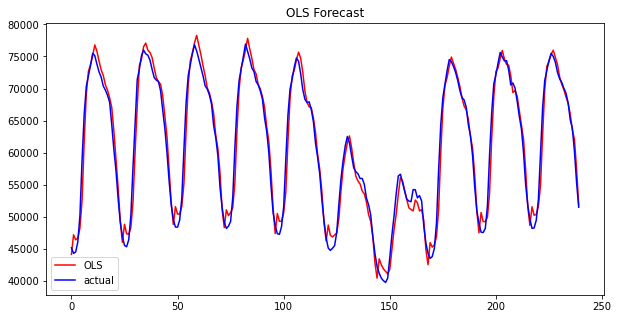

In [12]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

print("Root mean squared error is equal to :",np.sqrt(mean_squared_error(y_pred, y_test)))
print("Mean Absolute percentage error is equal to:", mean_absolute_percentage_error(y_test, y_pred))


plt.figure(0, figsize=(10,5))
plt.plot(y_pred[:240], c='r', label='OLS')
plt.plot(y_test.values[:240], c='b', label='actual')
plt.title('OLS Forecast')
plt.legend()